From: K.A.

This part focuses on Exploratory Data Analysis through statistical calculations and visualization.

## Exploratory data analysis
Exploratory data analysis (EDA) is the analysis of basic properties of data, finding common patterns, distributions and anomalies in it, and building initial models, often using visualization tools.

The goals of such analysis are:

* maximum "penetration" into the data,
* identification of the main structures,
* selecting the most important variables,
* detection of outliers and anomalies,
* testing of the main hypotheses,
* development of initial models.


The main means of exploratory analysis are the study of probability distributions of variables, the construction and analysis of correlation matrices, factor analysis, discriminant analysis, and multivariate scaling.

Here we will look at only some of them.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading and reviewing a dataset
We will use one of the educational sets as the data source ([wine quality](https://archive.ics.uci.edu/ml/datasets/wine+quality))

In [3]:
# read the dataset

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                 sep=';')
#Let's see what's out there
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# additional information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


What can we say when we see this?
- The data contains only floating point and integer values.

- All variables in the columns are non-zero (no empty or missing values).

- And something else.

In [5]:
#calculate important statistical characteristics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Some observations:

There is a large difference between the 75% and maximum values of the predictors "residual sugar", "free sulfur dioxide" and "total sulfur dioxide".

This may indicate that there is a large variation in the data.

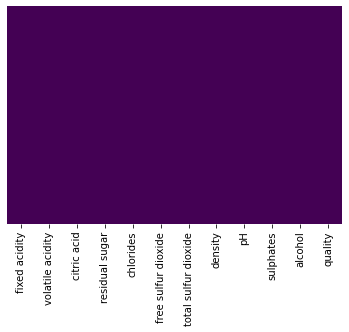

In [6]:
#Search for missing values through visualization
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

As we can see, there are no missing values in the data set. If there were, we would have seen values represented by a different color on a purple background. But just above we have already seen that there are no missing values.

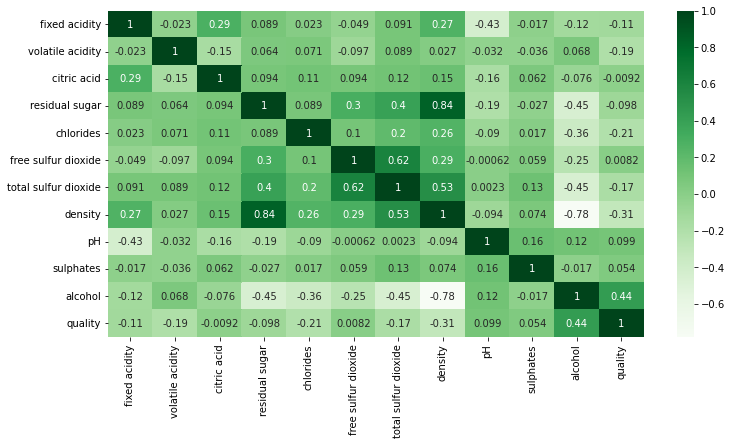

In [7]:
# Now let's look at possible correlations between values in the dataset. 
# Again, we will do this through visualization
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

As you can see above, the higher the value of the correlation coefficient (in cells) and the darker the color, the stronger the relationship between the variables.

##Let's move on to other visualizations

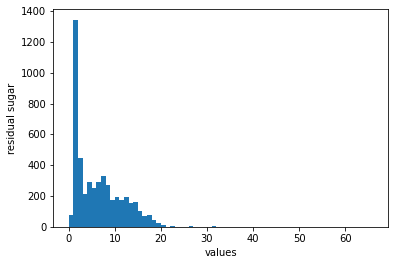

In [8]:
# plot the histogram
bin_edges = np.arange(0, df['residual sugar'].max() + 1, 1)
fig = plt.hist(df['residual sugar'], bins=bin_edges)

# add labels to the graph
plt.xlabel('values')
plt.ylabel('residual sugar')
plt.show()

## Scatterplot

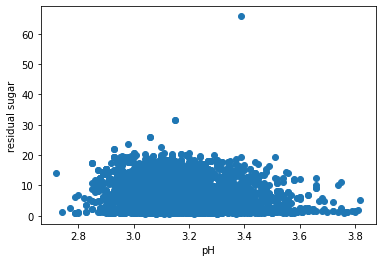

In [9]:
# plotting a diagram
fig = plt.scatter(df['pH'], df['residual sugar'])

# add the desired labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

## Scatter Matrix

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

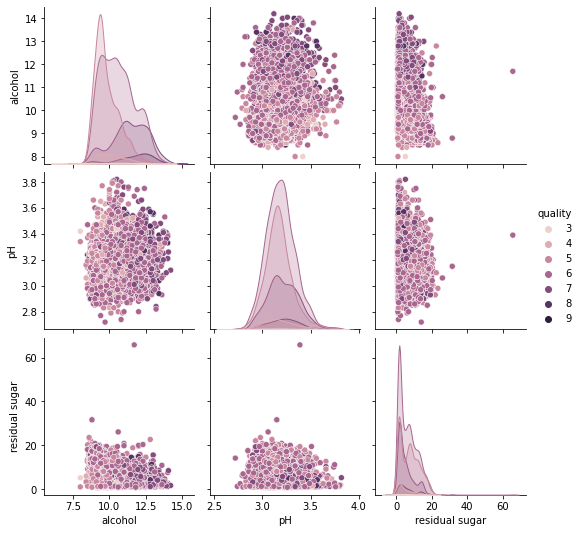

In [11]:
# create a scatter matrix
fig = sns.pairplot(data=df[['alcohol', 'pH', 'residual sugar', 'quality']], 
                   hue='quality')

# add labels
plt.xlabel('pH')
plt.ylabel('resudual sugar')
plt.show()

## Cumulative distribution function (graph)




42.81 perc. has 4 or less units of residual sugar


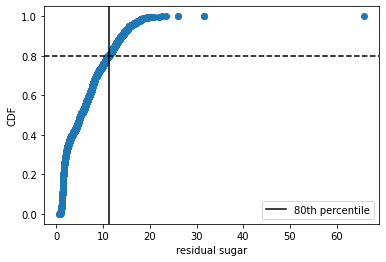

In [12]:
# sort and normalize the data
x = np.sort(df['residual sugar'])
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

# create a graph of the function
plt.plot(x, y, marker='o', linestyle='')


# add the desired labels
plt.ylabel('CDF')
plt.xlabel('residual sugar')

percent_four_or_less = y[x <= 4].max()
print('%.2f perc. has 4 or less units of residual sugar' % 
      (percent_four_or_less*100))

eightieth_percentile = x[y <= 0.8].max()

plt.axhline(0.8, color='black', linestyle='--')
plt.axvline(eightieth_percentile, color='black', label='80th percentile')
plt.legend()
plt.show()

## Boxplot

- Distribution of data by median and percentile (median is 50th percentile)

In [13]:
percentiles = np.percentile(df['alcohol'], q=[25, 50, 75])
percentiles

array([ 9.5, 10.4, 11.4])

Let's use a ready-to-use function (matplotlib.pyplot.boxplot):

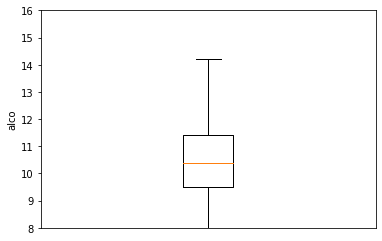

In [14]:
plt.boxplot(df['alcohol'])

plt.ylim([8, 16])
plt.ylabel('alco')

fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

## Violin graph
The graph is a combination of two types of diagrams: the y (or x) axis shows values with the scatter (like on the boxplot), while the other axis shows the smoothed density of the value distribution, and in the form of two halves mirrored relative to zero. In typical cases, you get a pattern similar to the contours of a violin.

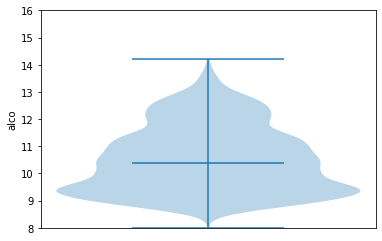

In [15]:
plt.violinplot(df['alcohol'], [0], 
               points=100, 
               bw_method='scott',
               showmeans=False, 
               showextrema=True, 
               showmedians=True)

plt.ylim([8, 16])
plt.ylabel('alco')
fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()